In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/comentarios.csv")

In [34]:
df.head(10)

,autor_comentario,autor_endereco,comentario_corpo,comentario_data,comentario_titulo
0,JOSEANTONIOROCHA,"Salvador, BA",É uma maravilha da natureza e de obra de engen...,set de 2022 • Amigos,Maravilha da natureza e da engenharia!
1,Juu,"Águas de Lindóia, SP",Descemos e subimos de bike. Foi a melhor exper...,ago de 2022 • Casais,Paraíso de beleza natural
2,Carol Conde,"Rio de Janeiro, RJ",Nosso roteiro incluia a subida da serra e foi ...,jul de 2022 • Casais,A SUBIDA É MELHOR!
3,Roseane P,"Maringá, PR","Passeio encantador, a serra gaúcha é muito i...",jul de 2022 • Casais,Surpreendente
4,daltonras,"Teresópolis, RJ",Lugar incrível. As condições da pista podiam s...,mai de 2022,Estrada incrível
5,Jorge B,"Curitiba, PR",Passeio muito legal. No caminho de Urubici até...,jun de 2022 • Família,Serra sensacional
6,Gilberto P,45 contribuições,"Visual incrível, traçado com muitas curvas e e...",mai de 2022 • Casais,Visual imperdível!
7,Izabel R,"Campo Novo do Parecis, MT",É a terceira vez que passamos pela Serra do Ri...,abr de 2022 • Casais,Serra Maravilhosa
8,Viajantegaucho,"Porto Alegre, RS",Sensacional estrada que sobe a Serra do Rio do...,abr de 2022,Curvas Inesquecíveis...
9,Israel Pires,25 contribuições,Já fui 4 vezes na serra.,mar de 2022 • Amigos,Serra do Rio do Rasto!


In [35]:
df.shape

(1900, 5)

In [ ]:
# df[df["autor_endereco"] == "contribuições"]

In [36]:
df[["cidade", "estado"]] = df["autor_endereco"].str.rsplit(pat = ", ", n = 1, expand = True)

In [40]:
df[["data", "publico"]] = df["comentario_data"].str.rsplit(pat = " • ", n = 1, expand = True)

In [41]:
df.head()

,autor_comentario,autor_endereco,comentario_corpo,comentario_data,comentario_titulo,cidade,estado,data,publico
0,JOSEANTONIOROCHA,"Salvador, BA",É uma maravilha da natureza e de obra de engen...,set de 2022 • Amigos,Maravilha da natureza e da engenharia!,Salvador,BA,set de 2022,Amigos
1,Juu,"Águas de Lindóia, SP",Descemos e subimos de bike. Foi a melhor exper...,ago de 2022 • Casais,Paraíso de beleza natural,Águas de Lindóia,SP,ago de 2022,Casais
2,Carol Conde,"Rio de Janeiro, RJ",Nosso roteiro incluia a subida da serra e foi ...,jul de 2022 • Casais,A SUBIDA É MELHOR!,Rio de Janeiro,RJ,jul de 2022,Casais
3,Roseane P,"Maringá, PR","Passeio encantador, a serra gaúcha é muito i...",jul de 2022 • Casais,Surpreendente,Maringá,PR,jul de 2022,Casais
4,daltonras,"Teresópolis, RJ",Lugar incrível. As condições da pista podiam s...,mai de 2022,Estrada incrível,Teresópolis,RJ,mai de 2022,None


In [62]:
df.dropna(subset=["estado"], inplace = True)
df.dropna(subset=["comentario_corpo"], inplace = True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_3840\3098574915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["estado"], inplace = True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_3840\3098574915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["comentario_corpo"], inplace = True)


In [47]:
df.shape

(1604, 9)

In [48]:
df.columns

Index(['autor_comentario', 'autor_endereco', 'comentario_corpo',
       'comentario_data', 'comentario_titulo', 'cidade', 'estado', 'data',
       'publico'],
      dtype='object')

In [49]:
df = df[['autor_comentario','comentario_corpo', 'comentario_titulo', 'cidade', 'estado', 'data', 'publico']]

In [ ]:

df["comentario_titulo"] = df["comentario_titulo"].apply(lambda x: x.lower())

In [65]:
df.head()

,autor_comentario,comentario_corpo,comentario_titulo,cidade,estado,data,publico
0,JOSEANTONIOROCHA,é uma maravilha da natureza e de obra de engen...,maravilha da natureza e da engenharia!,Salvador,BA,set de 2022,Amigos
1,Juu,descemos e subimos de bike. foi a melhor exper...,paraíso de beleza natural,Águas de Lindóia,SP,ago de 2022,Casais
2,Carol Conde,nosso roteiro incluia a subida da serra e foi ...,a subida é melhor!,Rio de Janeiro,RJ,jul de 2022,Casais
3,Roseane P,"passeio encantador, a serra gaúcha é muito i...",surpreendente,Maringá,PR,jul de 2022,Casais
4,daltonras,lugar incrível. as condições da pista podiam s...,estrada incrível,Teresópolis,RJ,mai de 2022,None


In [67]:
#Juntando todos os titulos e separando com um espaço
todos_comentarios = " ".join(df["comentario_corpo"])

In [85]:
stopwords = set(STOPWORDS)
stopwords.update(["por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes', "nos", "já", "há", "até", "foi", "como", "quem", "cada","lá", "sem", 'vai','que','ou', "muita", "das", "bem", 'anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

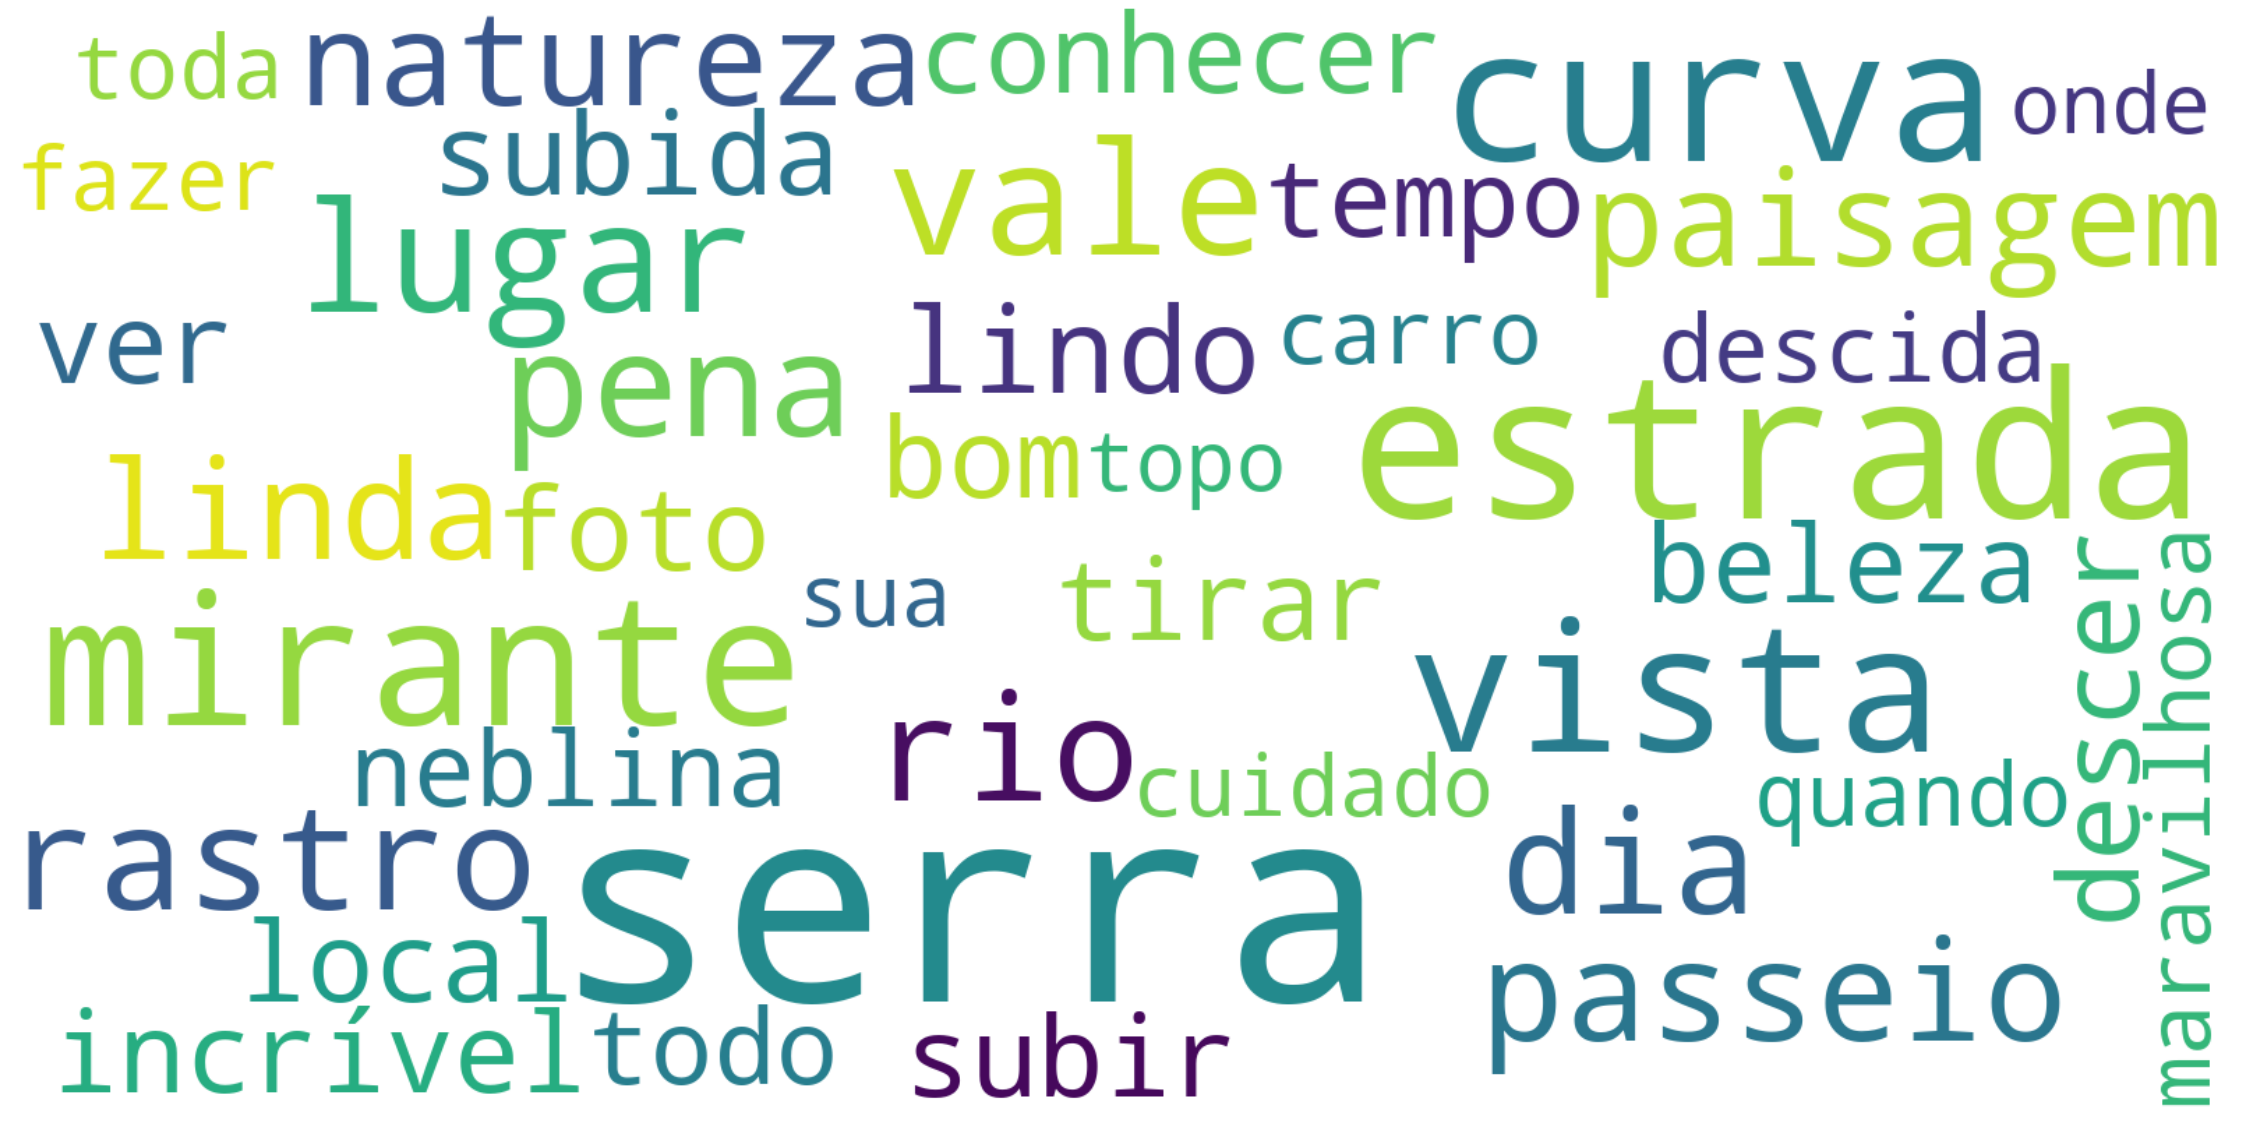

In [86]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800,max_font_size=200, max_words=40,collocations=False, background_color='white').generate(todos_comentarios)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()